<ipython-input-3-f29bcf3e7b25>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
<ipython-input-3-f29bcf3e7b25>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
<ipython-input-3-f29bcf3e7b25>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
<ipython-input-3-f29bcf3e7b25>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

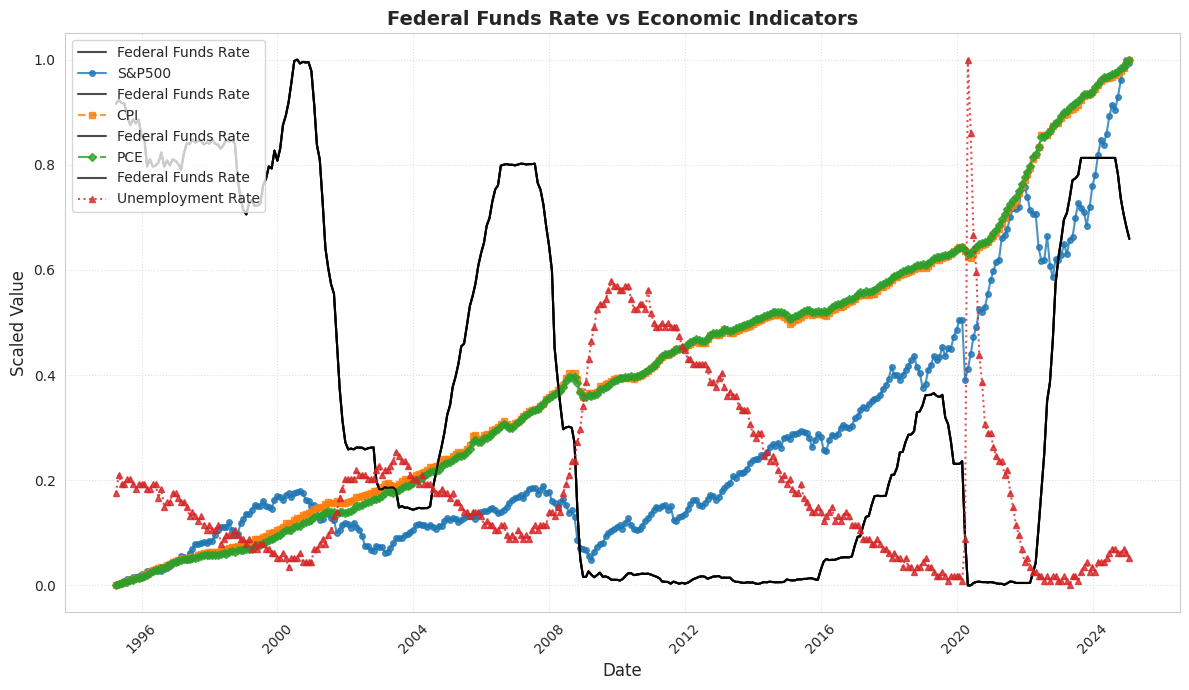

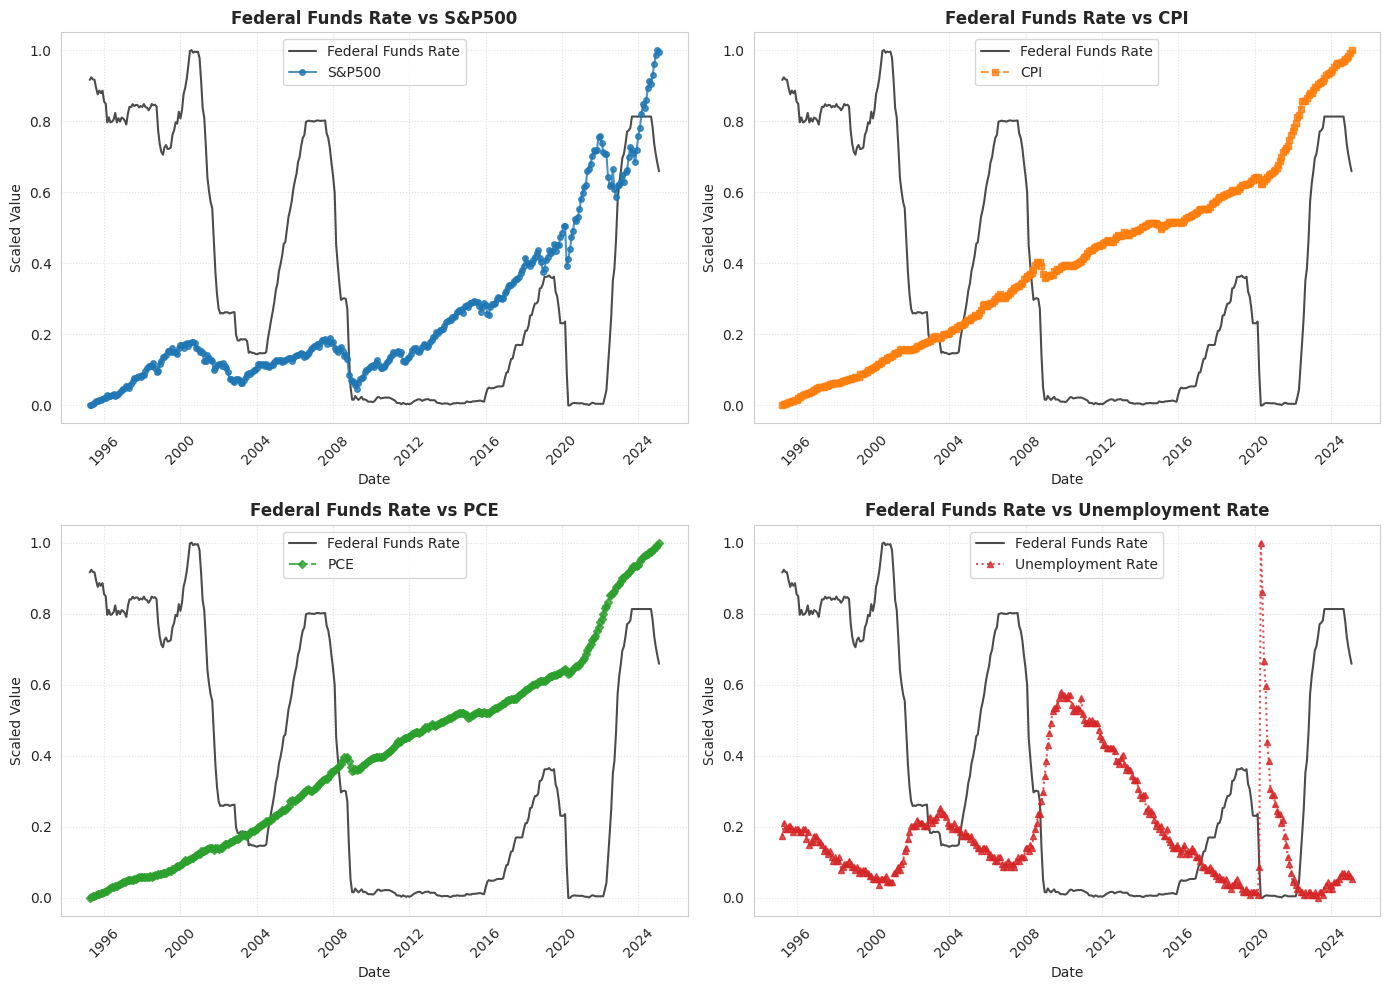

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set consistent seaborn style
sns.set_style("whitegrid")

# Load datasets
dff = pd.read_excel("/content/DFF.xlsx", header=None)
sp500 = pd.read_csv("/content/s_and_p_500_data.csv")
cpi = pd.read_excel("/content/CPIAUCSL.xlsx", header=None)
pce = pd.read_excel("/content/PCEPI.xlsx", header=None)
unrate = pd.read_excel("/content/UNRATE.xlsx", header=None)

# Rename columns
dff.columns = ["Date", "Federal Funds Rate"]
sp500 = sp500[["Date", "Close"]].copy()
sp500.columns = ["Date", "S&P500"]
cpi.columns = ["Date", "CPI"]
pce.columns = ["Date", "PCE"]
unrate.columns = ["Date", "Unemployment Rate"]

# Convert Date columns to datetime (force conversion)
for df in [dff, sp500, cpi, pce, unrate]:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop NaT values
for df in [dff, sp500, cpi, pce, unrate]:
    df.dropna(subset=["Date"], inplace=True)

# Ensure Date column is sorted
for df in [dff, sp500, cpi, pce, unrate]:
    df.sort_values(by="Date", inplace=True)

# Set Date as index before resampling
dff = dff.set_index("Date").resample("ME").mean().reset_index()
sp500 = sp500.set_index("Date").resample("ME").mean().reset_index()
cpi = cpi.set_index("Date").resample("ME").mean().reset_index()
pce = pce.set_index("Date").resample("ME").mean().reset_index()
unrate = unrate.set_index("Date").resample("ME").mean().reset_index()

# Merge datasets on Date (INNER JOIN to avoid NaNs)
merged_df = dff.merge(sp500, on="Date", how="inner")
merged_df = merged_df.merge(cpi, on="Date", how="inner")
merged_df = merged_df.merge(pce, on="Date", how="inner")
merged_df = merged_df.merge(unrate, on="Date", how="inner")

# Ensure merged dataset is not empty
if merged_df.shape[0] == 0:
    raise ValueError("Merged DataFrame is empty. Check for missing dates in datasets.")

# Normalize data for comparison
scaler = MinMaxScaler()
merged_df.iloc[:, 1:] = scaler.fit_transform(merged_df.iloc[:, 1:])

# Define aesthetics
factors = ["S&P500", "CPI", "PCE", "Unemployment Rate"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
line_styles = ["-", "--", "-.", ":"]
markers = ["o", "s", "D", "^"]

### **1️⃣ Combined Visualization (All Factors in One Figure)**
plt.figure(figsize=(12, 7))

for i, factor in enumerate(factors):
    plt.plot(merged_df["Date"], merged_df["Federal Funds Rate"],
             label="Federal Funds Rate", color="black", linestyle="solid", alpha=0.7)

    plt.plot(merged_df["Date"], merged_df[factor],
             label=factor, color=colors[i], linestyle=line_styles[i], marker=markers[i], markersize=4, alpha=0.8)

# Formatting
plt.title("Federal Funds Rate vs Economic Indicators", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Scaled Value", fontsize=12)
plt.legend(frameon=True, loc="upper left", fontsize=10)
plt.grid(True, linestyle="dotted", alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### **2️⃣ Separate Visualizations for Individual Comparisons**
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, factor in enumerate(factors):
    axes[i].plot(merged_df["Date"], merged_df["Federal Funds Rate"],
                 label="Federal Funds Rate", color="black", linestyle="solid", alpha=0.7)

    axes[i].plot(merged_df["Date"], merged_df[factor],
                 label=factor, color=colors[i], linestyle=line_styles[i], marker=markers[i], markersize=4, alpha=0.8)

    axes[i].set_title(f"Federal Funds Rate vs {factor}", fontsize=12, fontweight="bold")
    axes[i].legend(frameon=True)
    axes[i].grid(True, linestyle="dotted", alpha=0.6)
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Scaled Value")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


